In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from kan import *
import torch
import matplotlib.pyplot as plt



In [2]:
class RegressionDatasets:
    """Utility class for generating and loading regression datasets"""

    @staticmethod
    def generate_synthetic_data(n_samples=100, n_features=5, noise=1, random_state=42):
        """Generate synthetic regression data"""
        X, y = make_regression(
            n_samples=n_samples,
            n_features=n_features,
            n_informative=n_features,
            noise=noise,
            random_state=random_state,
        )
        return X, y

In [3]:
X, y = RegressionDatasets.generate_synthetic_data(n_features=1)
display(X[:5], y[:5])
print(type(X), type(y), X.shape, y.shape)

array([[ 0.93128012],
       [ 0.08704707],
       [-1.05771093],
       [ 0.31424733],
       [-0.47917424]])

array([ 40.06338413,   2.26356935, -43.22685538,  12.85800079,
       -19.77497166])

<class 'numpy.ndarray'> <class 'numpy.ndarray'> (100, 1) (100,)


In [4]:
def plot_dataset(x, y, title):
    plt.rcParams["figure.figsize"] = (12, 8)
    plt.rcParams["lines.markersize"] = 12
    plt.scatter(x, y, marker="x", c="r")
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

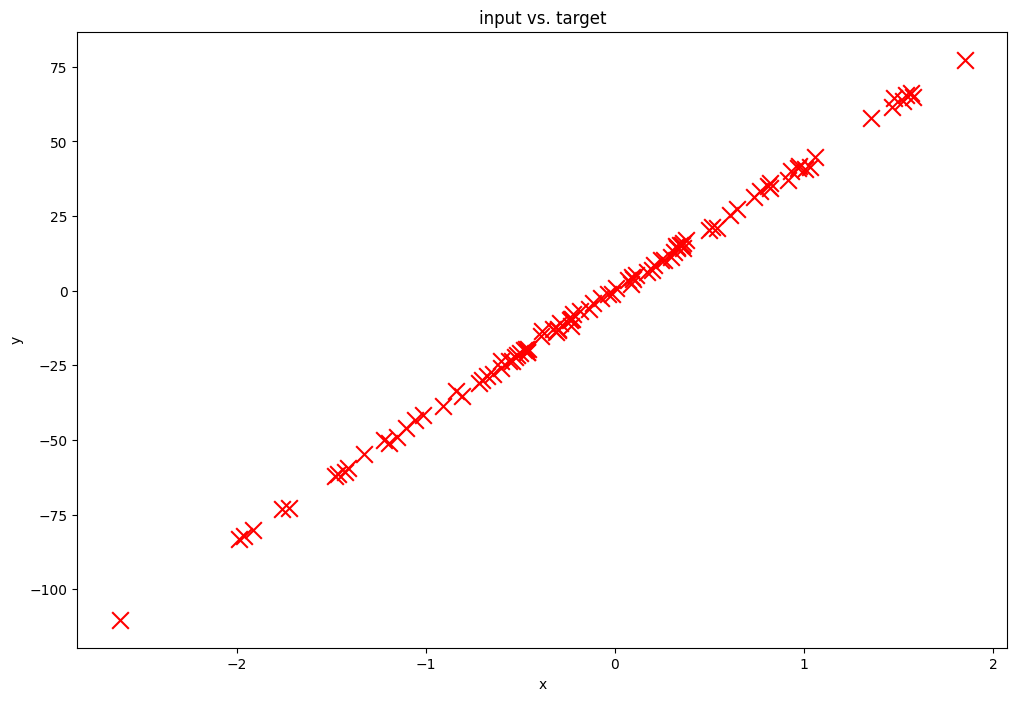

In [5]:
plot_dataset(x=X, y=y, title="input vs. target")

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

model = KAN(width=[1, 5, 1], grid=3, k=3, seed=1, device=device)

# Prepare data for KAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to tensors and move to the same device as model
X_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y.reshape(-1, 1), dtype=torch.float32).to(device)

# Create dataset in KAN format
dataset = {
    "train_input": X_tensor,
    "train_label": y_tensor,
    "test_input": X_tensor,  # Using same data for test (in practice, use separate test set)
    "test_label": y_tensor,
}

model.fit(dataset, opt="LBFGS", steps=20, lamb=0.002, lamb_entropy=2.0);

cuda
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.02e-01 | test_loss: 9.02e-01 | reg: 1.58e+02 | : 100%|█| 20/20 [00:07<00:00,  2.74it

saving model version 0.1


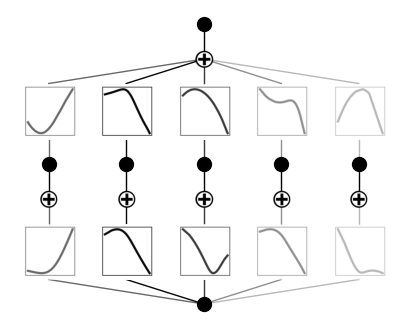

In [7]:
model.plot()